# Anonymous Functions

$\lambda$-expressions provide a concise way to create very simple functions. While the syntax is somewhat odd, it's quite readable once you know the correct idiom. 

In [1]:
# "double is the function that takes x and multiplies it by 2"
double = lambda x: 2*x 

# same as:
# def double(x):
#     return 2*x

double(4)

8

In [2]:
# "second_char is the function that returns the second character of a string s"
second_char = lambda s: s[1] 

In [3]:
second_char("Picard")

'i'

$\lambda$ expressions are extremely useful when a relatively simple function is required, for example when sorting lists. 

In [4]:
# sort a list into even and odd:

L = [4, 6, 9, 3, 4, 6, 7, 3, 2, 0, 9, 5]
L.sort(key = lambda x: (x % 2) == 1)
L

[4, 6, 4, 6, 2, 0, 9, 3, 7, 3, 9, 5]

In [5]:
# decreasing order within even and odd groups

L.sort(key = lambda x: ((x % 2) == 1, -x))
L

[6, 6, 4, 4, 2, 0, 9, 9, 7, 5, 3, 3]

In [6]:
# lambda functions also accept multiple arguments

multiply = lambda x,y: x*y
multiply(2, 3)

6

Don't let your $\lambda$-expressions get too complicated. Generally speaking, these expressions should not contain control flow statements, and should not be longer than a single, 80-character line of code. If your $\lambda$-expression is getting complex, use an explicitly-defined function instead. 

In [7]:
                                                                                # 80 characters

# Arguments and Keyword Arguments

In some cases, we might not know how many arguments a function will accept. For example, consider the following function:

In [8]:
def add(a, b):
    return(a+b)
add(2, 2)

4

This works, but only for two numbers. 

In [9]:
add(2, 2, 2)

TypeError: add() takes 2 positional arguments but 3 were given

Of course, we could define a version of "add" that works with three numbers, or four....but there's a better way. 

The special `*args` argument can be passed to the function. Within the function scope, `args` (no `*` asterisk) is then a list of all **positional** arguments passed to the function. So, we can write a general `add` this way:

In [10]:
def better_add(*args):
    total = 0
    # args is a list containing all of the inputs
    for a in args:
        total += a
    return(total)

better_add(2, 2), better_add(2, 2, 2), better_add(2, 2, 2, 2, 2)

(4, 6, 10)

In some cases, you might not be sure how many **keyword** arguments will be used in your function. In this case, use `**kwargs` (with two `*` asterisks). Having done so, `kwargs` will be available as a dictionary within the function scope. 

In [11]:
def favorites(**kwargs):    
    for key, val in kwargs.items():
        print("My favorite " + key + " is " + val + ".")

favorites(TV = "Star Trek", captain = "Picard")

My favorite TV is Star Trek.
My favorite captain is Picard.


It is possible to use `*args` and `**kwargs` together. Since positional arguments always come first, it's necessary to use `*args` before `**kwargs`. 

An especially useful application of `**kwargs` occurs when one is using functions from modules with many optional arguments. For example, the `scatter` command in the `matplotlib` library has a [large number of keyword arguments](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html). If you want to call this function in a custom function, then you don't have to enumerate all of them: use `**kwargs` and it just works. 

In [12]:
from matplotlib import pyplot as plt
import random

def random_scatter(n, **kwargs):
    """
    produce a scatter plot of n random 2d points 
    """
    x, y = [], []
    for i in range(n):
        x.append(random.random())
        y.append(random.random())
    plt.scatter(x, y, **kwargs)

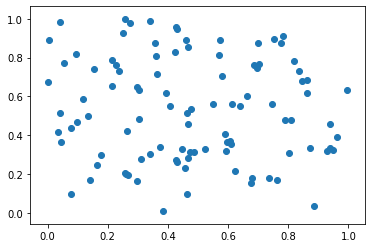

In [13]:
random_scatter(100)

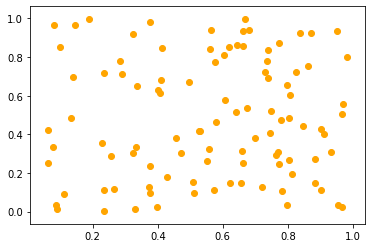

In [14]:
random_scatter(100, color = "orange")

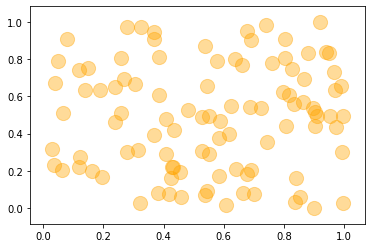

In [15]:
# make the points very large and slightly transparent
random_scatter(100, color = "orange", s = 200, alpha = 0.4)